<a href="https://colab.research.google.com/github/Jakhongir0103/Gender_classification_model/blob/main/Human_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import fastai
import torch
from fastai.vision.all import *
from ipywidgets import widgets

print(fastai.__version__)
print(torch.__version__)

2.7.9
1.12.1+cu113


In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!pip install -r /content/OIDv4_ToolKit/requirements.txt
# !python /content/OIDv4_ToolKit/main.py -h

In [ ]:
!python /content/OIDv4_ToolKit/main.py --Dataset /content/dataset/animals_and_humans downloader --classes Animal --type_csv train --limit 500 --y

In [ ]:
# !cd /content/dataset/animals_and_humans/train/Animal && mv * /content/dataset/animals_and_humans/Non_human
# I also uploaded 500 images of humans from the dataset at the link: https://www.kaggle.com/datasets/ashwingupta3012/male-and-female-faces-dataset

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


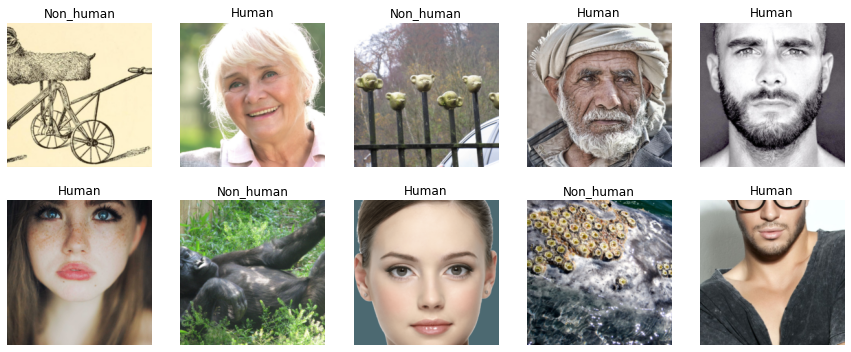

In [ ]:
# path
path = Path('/content/dataset/animals_and_humans')

# datablock
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(seed=42, valid_pct=0.2),
    item_tfms = Resize(224)
)

# dataloader
dls = db.dataloaders(path)

# visualize the data
dls.train.show_batch(max_n=10, nrows=2)

In [ ]:
# train
animals_learner = cnn_learner(dls=dls, metrics=accuracy, arch=resnet34)
animals_learner.fine_tune(4)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  for i,l in enumerate(["target", "predicted", "probabilities", "loss"]):
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,0.513412,0.004271,1.000000,03:11


epoch,train_loss,valid_loss,accuracy,time
0,0.038002,0.005602,0.995000,04:30
1,0.019755,0.015057,0.995000,04:34
2,0.014547,0.006863,0.995000,04:30
3,0.010758,0.007261,0.995000,04:36


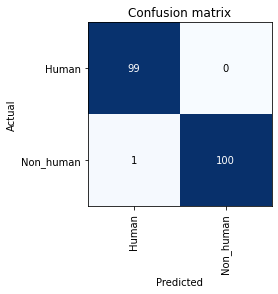

In [ ]:
# evaluation
interp = ClassificationInterpretation.from_learner(animals_learner)
interp.plot_confusion_matrix()

In [29]:
# test the model
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Non_human
Probability: 99.7%


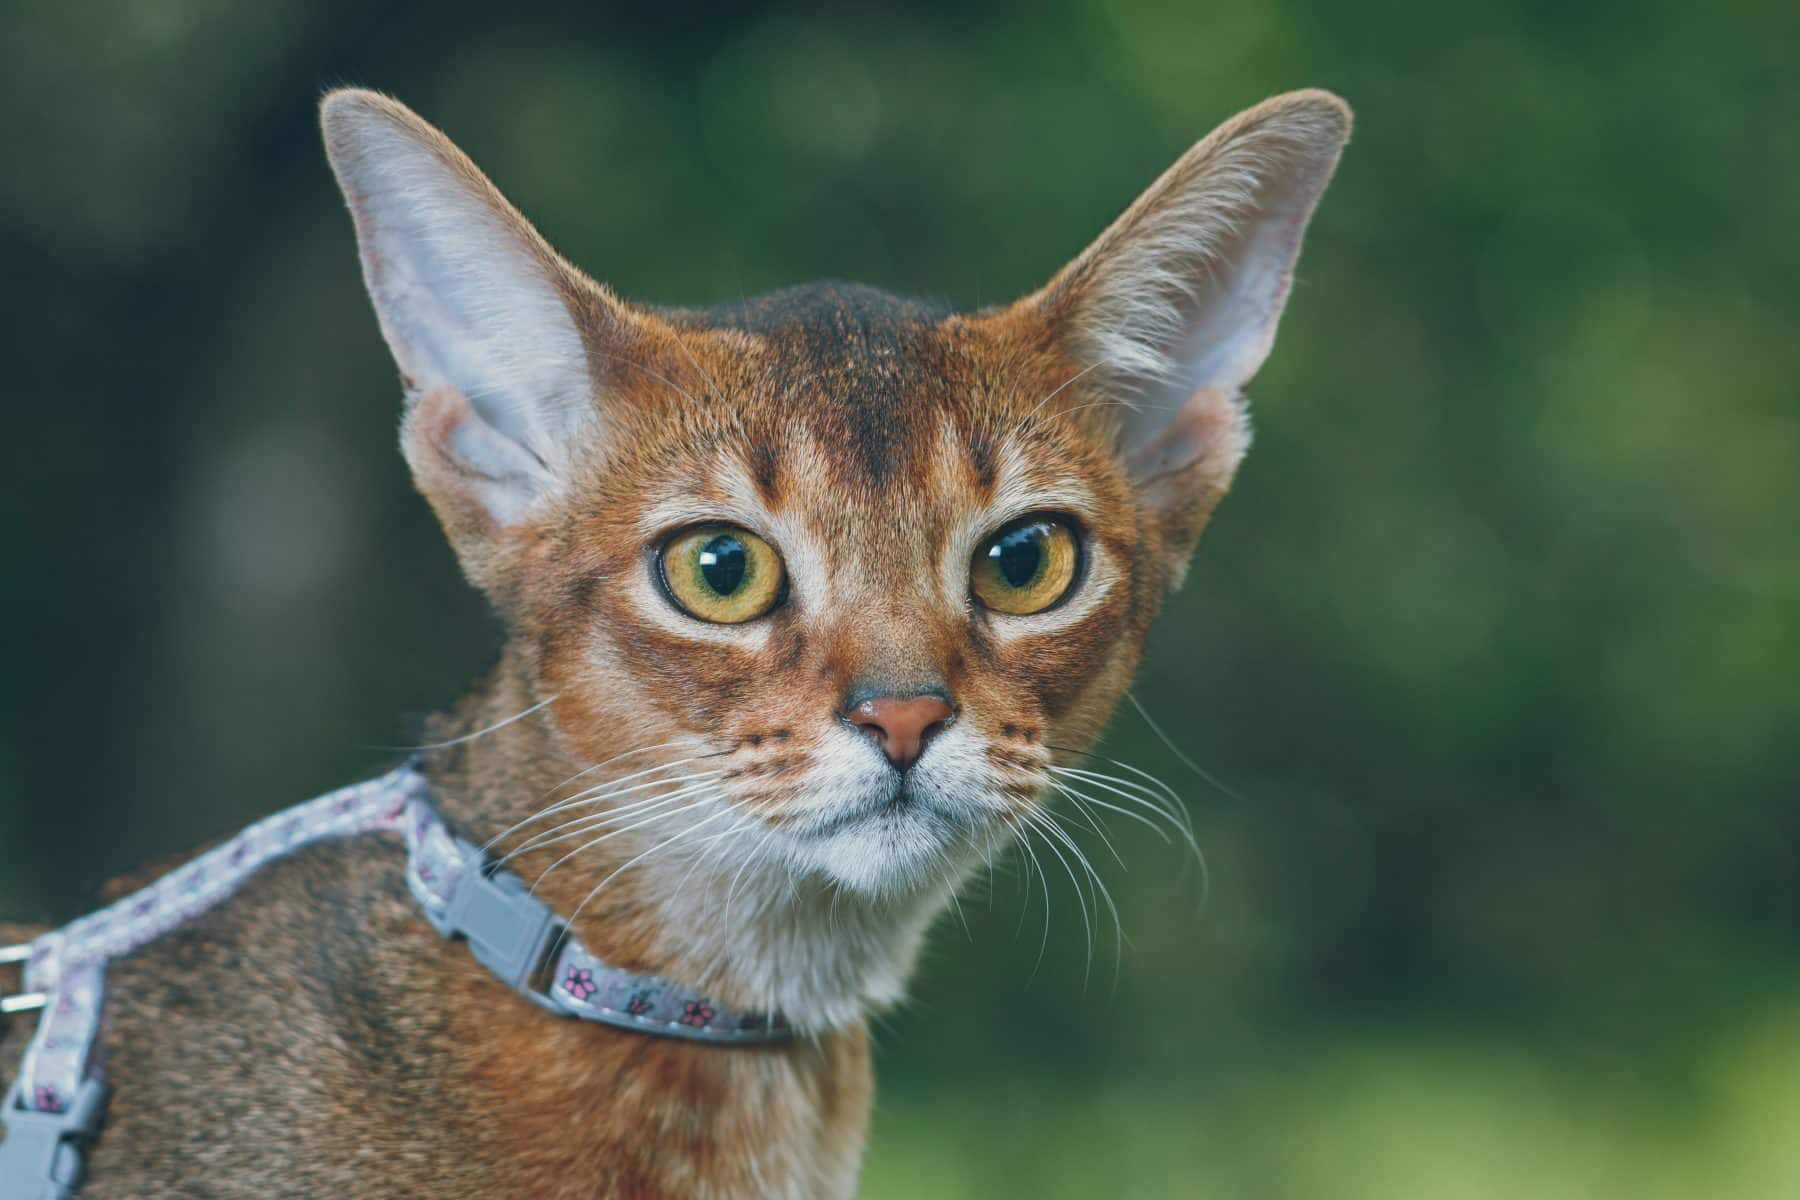

In [31]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = animals_learner.predict(img)
print(f'Prediction: {pred}')
print(f'Probability: {probs[pred_id]*100:.1f}%')
img

In [ ]:
animals_learner.export('humans_vs_non_humans_model.pkl')